# Capstone Webscrapping using BeautifulSoup

(Please insert the background here )



In [1]:
!pip install requests

In [2]:
import requests

url_get = requests.get('https://news.mifx.com/kurs-valuta-asing.php?kurs=JPY')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [5]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [6]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
  <tr class="colorWhite fontsize14 firstRow">
   <td>
    TANGGAL
   </td>
   <td>
    ASK
   </td>
   <td>
    BID
   </td>
  </tr>
  <tr class="verySoftGreyBg">
   <td>
    07 Agustus 2020
   </td>
   <td>
    139,42
   </td>
   <td>
    138,02
   </td>
  </tr>
  <tr>
   <td>
    06 Agustus 2020
   </td>
   <td>
    138,88
   </td>
   <td>
    137,48
   </td>
  </tr>
  <tr class=


In [7]:
tr = table.find_all('tr')
tr

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>07 Agustus 2020</td>
 <td>139,42</td>
 <td>138,02</td>
 </tr>,
 <tr>
 <td>06 Agustus 2020</td>
 <td>138,88</td>
 <td>137,48</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>05 Agustus 2020</td>
 <td>139,23</td>
 <td>137,84</td>
 </tr>,
 <tr>
 <td>04 Agustus 2020</td>
 <td>139,19</td>
 <td>137,79</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>03 Agustus 2020</td>
 <td>139,72</td>
 <td>138,32</td>
 </tr>]

Do the scrapping process here (please change this markdown with your explanation)

In [8]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
     #get bulan
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace

     # jual
    ask = row.find_all('td')[1].text
    ask = ask.strip() #for removing the excess whitespace
   
    #beli
    bid = row.find_all('td')[2].text
    bid = bid.strip() #for removing the excess whitespace 
    
    temp.append((tanggal,ask,bid)) 
    
    
    
    #scrapping process
    
temp 

[('07\xa0Agustus\xa02020', '139,42', '138,02'),
 ('06\xa0Agustus\xa02020', '138,88', '137,48'),
 ('05\xa0Agustus\xa02020', '139,23', '137,84'),
 ('04\xa0Agustus\xa02020', '139,19', '137,79'),
 ('03\xa0Agustus\xa02020', '139,72', '138,32')]

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp)
df

,0,1,2
0,07 Agustus 2020,"139,42","138,02"
1,06 Agustus 2020,"138,88","137,48"
2,05 Agustus 2020,"139,23","137,84"
3,04 Agustus 2020,"139,19","137,79"
4,03 Agustus 2020,"139,72","138,32"


In [10]:
df = pd.DataFrame(temp, columns = ('tanggal', 'ask', 'bid'))
df

,tanggal,ask,bid
0,07 Agustus 2020,"139,42","138,02"
1,06 Agustus 2020,"138,88","137,48"
2,05 Agustus 2020,"139,23","137,84"
3,04 Agustus 2020,"139,19","137,79"
4,03 Agustus 2020,"139,72","138,32"


In [11]:
df.dtypes

tanggal    object
ask        object
bid        object
dtype: object

In [12]:
!pip install dateparser

In [13]:
import dateparser

In [14]:
df.tanggal.apply(lambda x: dateparser.parse(x))

0   2020-08-07
1   2020-08-06
2   2020-08-05
3   2020-08-04
4   2020-08-03
Name: tanggal, dtype: datetime64[ns]

In [15]:
df.tanggal = df.tanggal.apply(lambda x: dateparser.parse(x))

In [16]:
df

,tanggal,ask,bid
0,2020-08-07,"139,42","138,02"
1,2020-08-06,"138,88","137,48"
2,2020-08-05,"139,23","137,84"
3,2020-08-04,"139,19","137,79"
4,2020-08-03,"139,72","138,32"


Do the data cleaning here (please change this markdown with your explanation)

In [17]:
df[['ask', 'bid']] = df[['ask', 'bid']].apply(lambda x: x.str.replace(",",".")) 
df[['ask', 'bid']] = df[['ask', 'bid']].astype('float64')

df

,tanggal,ask,bid
0,2020-08-07,139.42,138.02
1,2020-08-06,138.88,137.48
2,2020-08-05,139.23,137.84
3,2020-08-04,139.19,137.79
4,2020-08-03,139.72,138.32


In [18]:
df.dtypes

tanggal    datetime64[ns]
ask               float64
bid               float64
dtype: object

Do the data visualisation here. (please change this markdown with your explanation)

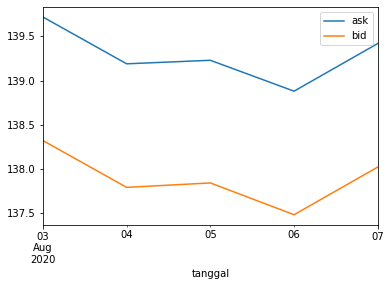

In [19]:
df.set_index('tanggal').plot()

In [27]:
dfs = df.melt(id_vars='tanggal', var_name='jual beli', value_name='kurs')

Put your analysis and conclusion here. 

then put your flask dashboard link here too.

In [23]:
import seaborn as sns
import plotly.express as px

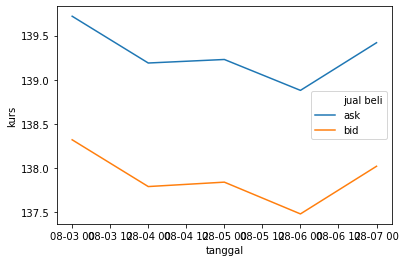

In [31]:
sns.lineplot(x = "tanggal", y ='kurs', hue='jual beli', data=dfs)
